## Final Project Report

#### Bojun Li (bl755), Jiongjiang Duan (jd2253), Jiaqi Zhang (jz2232), Lihe Cao (lc977)

### 1. Executive Summary

This report provides an analysis and evaluation of  potential vaccination and other pandemic-controlling strategies. Our team combined two basic models - the epidemic model and the vaccination model to single model to simplify and facilitate the simulation analysis.  According to our combined model and its corresponding assumptions, the report will mainly discuss five epidemic problems including hospital capacities, vaccination strategy and production, quarantine strategies, lockdown measures, and comparison between lockdown measures and ‘herd immunity’. The report consists of five parts, with detailed introduction of models, assumptions, settings and parameters, simulation and analysis of vaccination and other pandemic-controlling strategies and technical appendix of python codes. Detailed analysis on these pandemic strategies will be conducted by modifying models, plugging various parameters and visualizing the outcomes of each situation. 

According to the model analysis, our team makes the following business recommendations. After testing different infection and death numbers, we strongly recommend increasing the hospital capacity to minimize the number of deaths. In terms of the vaccination strategy, we believe giving vaccinations to all classes of people is more effective to control the spread of pandemic than simply giving vaccines to medical workers. 
    
We also conducted analysis on operational strategy to contain the pandemic. We found that quarantine is effective to control the total number of infections. In addition, this report will also compare lockdown and ‘herd immunity’ strategies. By changing the meeting rate of workers, we discovered that the total number of infections is significantly lower when we implement moderate lockdown measurement instead of the 'herd immunity' strategy, and thus lockdown is a better strategy to control the pandemic. 
      
More detailed analysis and model explanation will be shown in the second, third, and fourth sections of the report. 


### 2. Modeling Approach, Assumptions, and Parameters

In this project, our model studies the SIR epidemic and different approaches to reduce the spread of disease. Our goal is to study how the different factors such as meeting rate and vaccination rate and strategies like lockdown measures can decrease the number of deaths and reduce the total number of infected people. Specifically, we examine how the hospital capacity, vaccination strategy, qurantine strategy, lockdown measures and herd immunity can alleviate the negative impact that the disease brings to our life. It provides some recommendations to the local public health department, so the department can build on our model and plan the vaccination and combine some strategies to effectively decrease the transmission.

We used Markov chain simulation, implemented in Python, to simulate the SIR epidemic and to test different plans in controling the disease. It is tempting to believe that a model can capture the future. However, in the real world, the epidemic is notoriously difficult to estimate. While we have done our best to include the the most salient aspects of reality and to estimate the parameters that govern them well, the estimates for the outcomes are sensitive to parameters and other factors that we may not think of.

Before we look into the details of the model, we briefly introduce the models and the underlying assumptions. In the SIR setting, the infected people either have symptom or not and when they meet the susceptible people, the suceptible people will become infected. Part of the infected people will get cured with a recovery rate but the rest will die with a death rate. The interesting thing is that the meeting rates, recovery rates and death rates are different among agents, patients and locations, complicating the simulation of SIR epidemic. For example, the medical workers have higher meeting rates with patients but they wear the protective gears, leading to lower infection rates. Thus, we can adjust the parameters of these rates to study how the change in the parameters will influence the spread of disease and what kind of actions we can take for each scenario. Below are the detailed assumptions related to the SIR model:

1. Agents Classification:

> We assume there are four classes of agents: medical workers, essential non-medical workers, non-essential high risk and non-essential low-risk. We have an initial population for each of the class. 

2. Type of infections:

- Infected without symptom: the person who is infected but shows no symptom
- Infected with symptom: the person who is infected and shows symptom
- Susceptible: the person who is very likely to be infected if he meets a infected person
- Resistant: the person is resistant to the disease either by recovery or by vaccination. Once a person is resistant, he will never get infected again.
- Death： infected people may die at a certain rate

3. Location of treatment: sent the patients to hospitals until the hospitals reach the maximum capacity 

- If a person is infected and become symptomatic, the person would be sent to hospitals. Patients in hospitals would only interact with essential medical workers at high meeting rates. Comparing to other infectants not in hispitals, patients in hospitals would recover faster and are less likely to die.

- If hospitals have reached the maximum capacity, new symptomatic patients will be quarantined (outside of hospitals) and would only interact with Essential Medical Workers at High Meeting Rate and interact with Essential Non-Medical Workers at Low Meeting Rate. People in quarantine would either recover and become resistant (at low recovery rate) or die (at high death rate).

4. Meeting rates: agents with different classification have different meeting rates with each other or patients in hospital or quarantine

- Essential Medical workers may meet essential medical workers at high meeting rates, with essential non-medical workers at high meeting rates, with non-essential high-risk workers at low meeting rates, with non-essential low-risk workers at low meeting rates, with patients in hospitals at high meeting rate, and with patients in quarantine at high meeting rate.

- Essential non-medical workers may meet essential non-medical workers at high meeting rate, with non-essential high-risk workers at high meeting rate, with non-essential low-risk workers at high meeting rate, and with patients in quarantine with low meeting rate.

- Non-essential high-risk workers may meet non-essential high-risk workers at low meeting rate, and with non-essential low-risk workers at low meeting rate.

- Non-essential low-risk workers may meet non-essential low-risk workers at low meeting rate.

5. Infection rates: agents with different classification have different likelihood to wear a protective gears, resulting in higher or lower infection rate

> When an infected person is not known to be symptomatic, other susceptible people would meet the person without protective gears and are thus would be more likely to get infected. On the other hand, essential medical and non-medical workers would usually wear protective gears when meeting patients in hospitals or in quarantine. Therefore, infections are less likely to happen during their meetings.

6. Recovery Rates and Death Rates: the patients in the hospital or quarantine have different recovery rates and death rates

> The patients staying at the hospital have higher recovery rate and lower death rate compared to patients who are in the quarantine. 

It's not hard to see that we need multiple parameters to reflect our assumptions. Here are the parameters regarding each assumption we stated above:

1. Parameters for Agents Classification:

- c1_n: Number of Essential Medical Workers

- c2_n: Number of Essential Non-Medical Workers

- c3_n: Number of Non-Essential High-Risk Workers

- c4_n: Number of Non-Essential Low-Risk Workers

2. Parameters for Type of Infections:

- c1_inf: Number of infected Essential Medical Workers

- c2_inf: Number of infected Essential Non-Medical Workers

- c3_inf: Number of infected Non-Essential High-Risk Workers

- c4_inf: Number of infected Non-Essential Low-Risk Workers

- pi: Probability that an Infected Person is Symptomatic

- vac_rate: Vaccination Rate

- vac_pri: Vaccination Priority, default is all vaccines are given to essential medical workers

3. Parameters for Location of treatment:

- Is_inf: Number of Patients in Hospitals

- R_res: Number of People that are Resistant

- H_cap: Hospital Capacity

4. Parameters for Meeting rates:

- h: High Meeting Rates

- l: Low Meeting Rates

- lockdown_fac: Lockdown multiplier from 0 to 1; 0: People Would not Meet; 1: People would meet as usual

5. Parameters for Infection rates: 

- inf_p_lo: Probability of Infection with Protective Gears

- inf_p_hi: Probability of Infection without Protective Gears

6. Parameters for Recovery Rates and Death Rates: 

- reco_lo: Recovery Rate for Infectants Not in Hospitals

- reco_hi: Recovery Rate for Infectants in Hospitals

- die_lo: Death Rate for Infectants in Hospitals

- die_hi: Death Rate for Infectants Not in Hospitals

7. Others:
- keep_hist: True - Keep the history of each group, might be slower; False - Not keeping the history


### 3. Model Details

In our model of simulating the SIR epidemic on a clustered network, we set the number of base groupes to be four. It is easy to generalzie when more groupes need to be considered or one of the groupes need to be subdivided into two. For simplicity, we assume there are only two meeting rates, which are high meeting rate and low meeting rate. This is also easy to generalize using our model if we want to have different meeting rate between classes. The meeting rates we use in this project are stated in the previous section. Then we can calculate the rate of a meeting event happens among different groupes.   
For example, to calculate the rate of meeting event happens between group $1$ and group $2$, when a susceptible person in group $2$ is infected by a virus carrier in group $1$:  
$$rate_{12} = i_1 * s_2 * \lambda_{12} $$  
where $i_1$ is the numbder of infected people in group $1$, $s_2$ is the numbder of susceptible people in group $2$ and $\lambda_{12}$ is the meeting rate between group $1$ and group $2$.  
We calculate the rate of a recovery event happens in a group in the a similar way. For example, the rate of recover event takes place in group $1$ is:   $$recover_1 = i_1 * \beta$$  
where $i_1$ and $\beta$ are the number of infected people and recover rate of of group $1$ respectively.  

Similarly, in our updated model, we consider the rate that infected people may die. For example, for infected people in group 1, the death rate is calculated as: $$death_1 = i_1 * \gamma_1 $$
where $i_1$ is the number of infected people in group 1 and $\gamma_1$ is the death rate for infected people in group 1.

After calculating the rate of all the events take place, our model begin to simulate how the pandemic affect people in each group. We first create an empty list for each type of agent to keep track of the population in each group. We then add up all the rates to get a total rate and so all the events have probabilities proportional to their rates.   

For each iteration, we generate a uniform random variable to decide which event happens. Since we assume that when a person is infected, the probability to be symptomatic is $p_i$, we generate another random variable to decide whether an a person who is infected is symptomatic or asymptomatic.   

Finally, we update the lists of agents according to the event type. For example, if an infected person in group $1$ recovers, then we delete that person from the list which keep track of infected people in group $1$ and add to the list of people who are resistant to the pandemic.

The flowchart below shows the dymanics of our model:

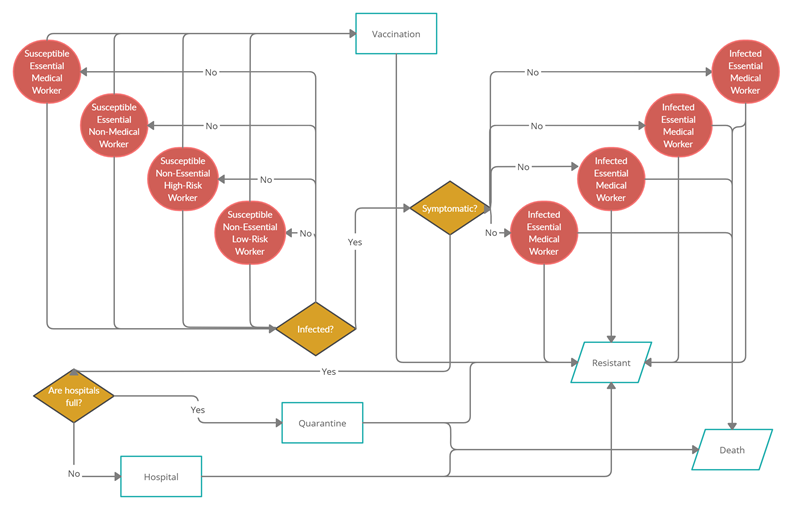

To ensure the correctness and reliability of our model, we have also tested the following extreme cases:  
1. Set $p_i = 0$, that is, when all the we do not separate infected person into aymptomatic and symptomatic. Simulation results show that the number of people in group $I_s$ remains at the constant 0. 
2. When meeting rates are set to 0 for all groups, then our result shows that there would be no new infections and initially infected people may either recover from the pandemic or die.
3. If we set death rates to 0, then when the simulations end, people are either resistant or susceptible. 
4. When setting infection probabilities (both with protective gear and without protective gears) to 0, then there would be no new infections and initially infected people may either recover from the pandemic or die.
5. If we set the hospital capacity to be greater than the total population, then the quarantine station would be empty at all times.

### 4. Model analysis



We tested different pandemic-controlling strategies with our model. To be specific, we tried out how total number of infections and total number of death change when we have:
1. Different Hospital Capacity (Maximum number of patients in hospitals at any time)
2. Different vaccination strategies (including vaccination priority and vaccine supply)
3. Different Quarantine Strategies
4. Different Lockdown Strategies
5. 'Herd Immunity' Strategies


#### 4.a Does Hospital Capacity Matter?

In our experiments, we tried out how the number of infections and death change when we have different hospital capacities. Recall that in our model, we assume that people in hospitals have higher recovery rate and lower death rate. Also, patients in hospitals may only interact with essential medical workers but people in quarantine may interact with both essential medical workers and essential non-medical workers.

The plot below shows how number of people in each group change over time:



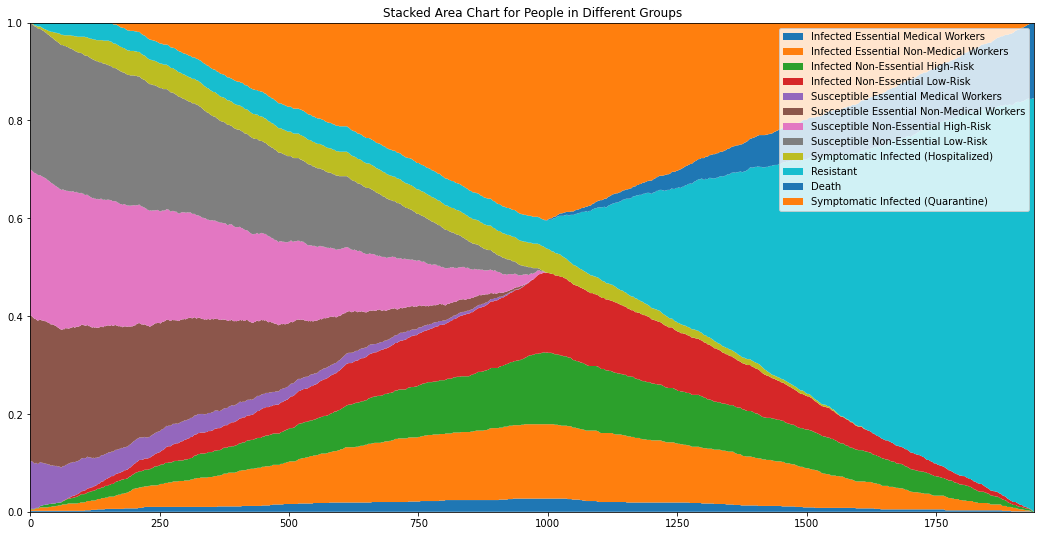

For our experiments, we tested the resulting number of infections and death when the hospital capacity changes from 2% of the total population to 20% of the total population with other parameters as follows:
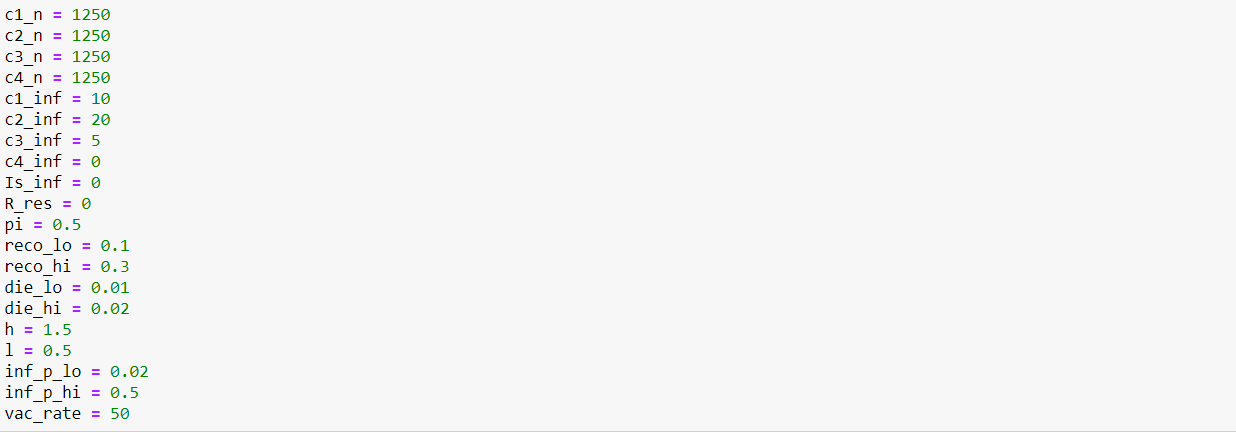

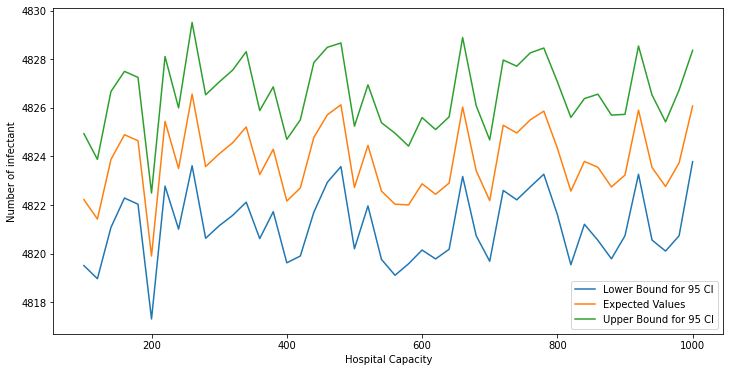

Plot above shows the number of infections with different hospital capacities. As we can see from the plot, there does not seem to be a linear relationship between these two. In other words, changing hospital capacities is probably not very effective in minimizing the total number of infections.

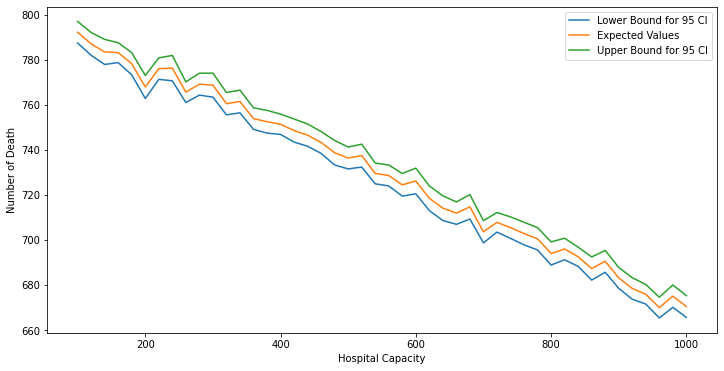

Different from the last plot, this one actually does have a clear downward trend. This shows increasing hospital capacities is indeed quite effective in lowering the total number of death. 

Therefore, to answer the question that whether increasing hospital capacities would work or not, we believe that increasing hospital capacities is not quite effective in controlling the total number of infections. However, it is very effective in minimizing the total number of death.

#### 4.b Which vaccination strategy should we use?

Here, we tested 3 vaccination strategies:
1. Only essential medical workers get vaccines
2. Only essential medical workers and essential non-medical workers get vaccines
3. All groups get vaccines

Plot below shows how number of people in each group change over time if only essential medical workers get vaccines.

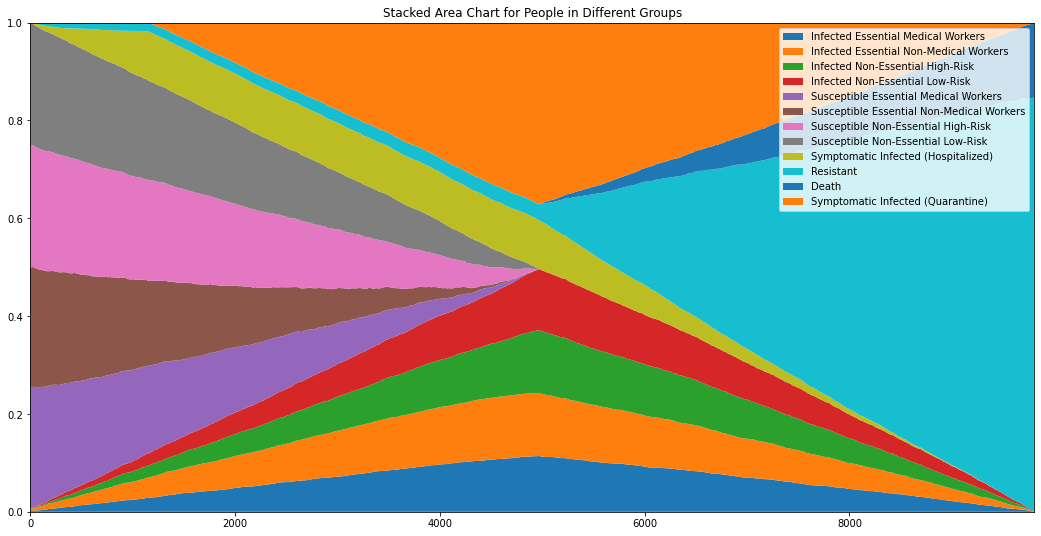

This plot (below) shows the result when essential medical workers and essential non-medical workers get vaccines.

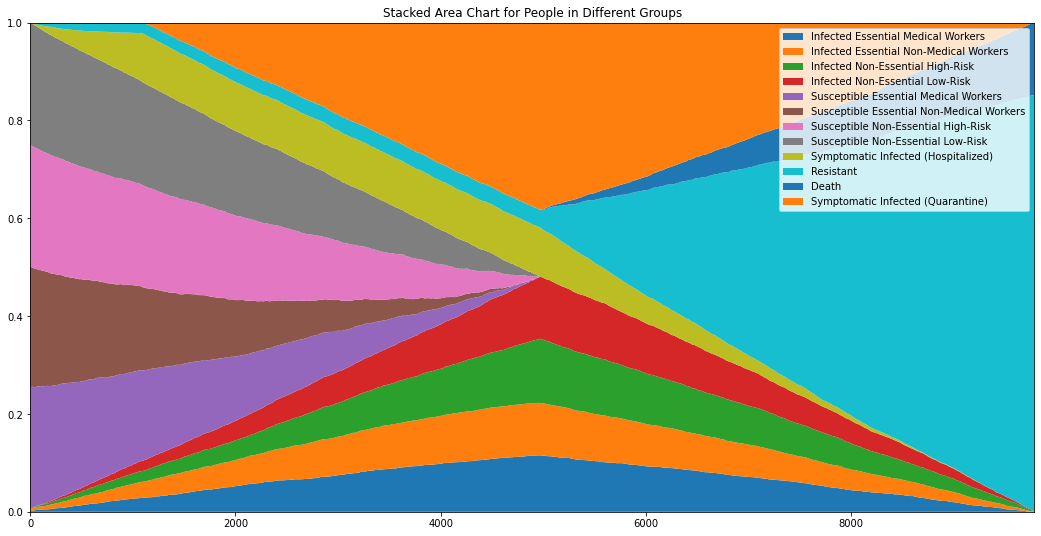

This plot shows the result when every group get vaccinated at the same rate:

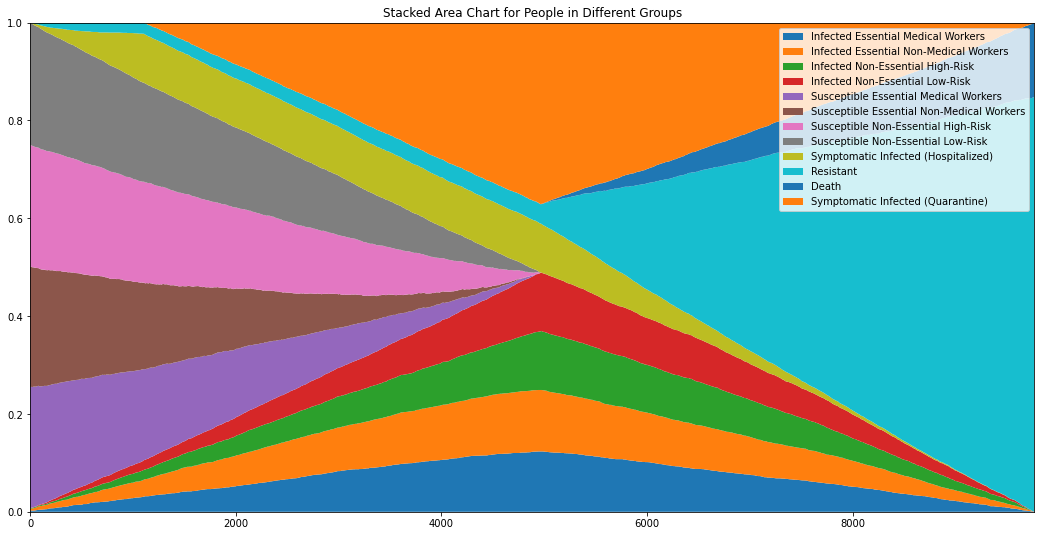

For our experiments, in addition to the 3 strategies, we also tested how results would change when we have different vaccine supply rate (from 10 vaccines per day to up to 500 vaccines per day, for a total population of 5000).

First, we tested the performance when we only vaccinate essential medical workers:

Total number of infections:

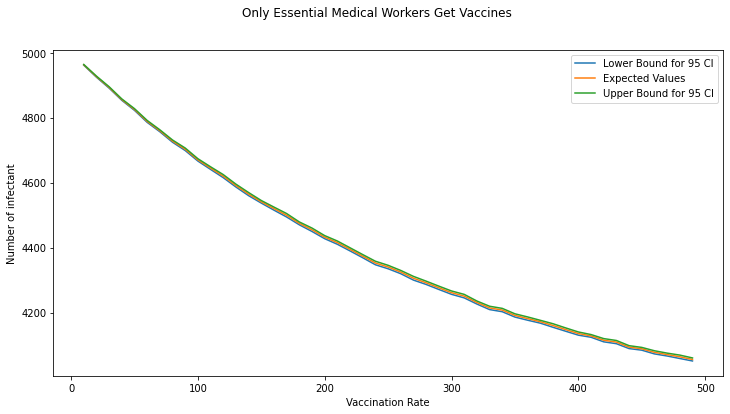

Total Number of death:

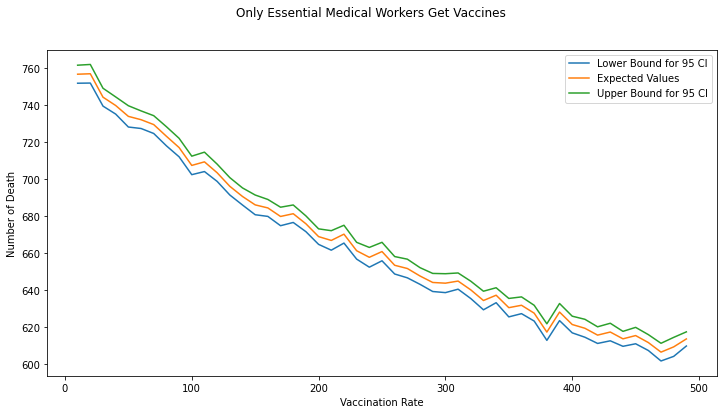

Now, we test the performance when we vaccinate essential medical workers and essential non-medical workers:

Total number of infections:

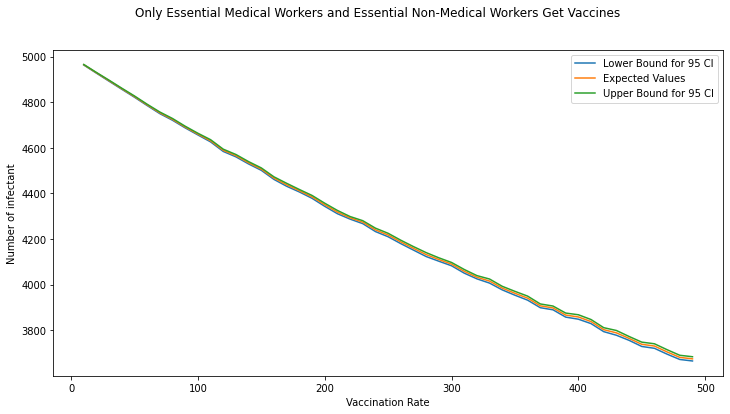

Total number of death:

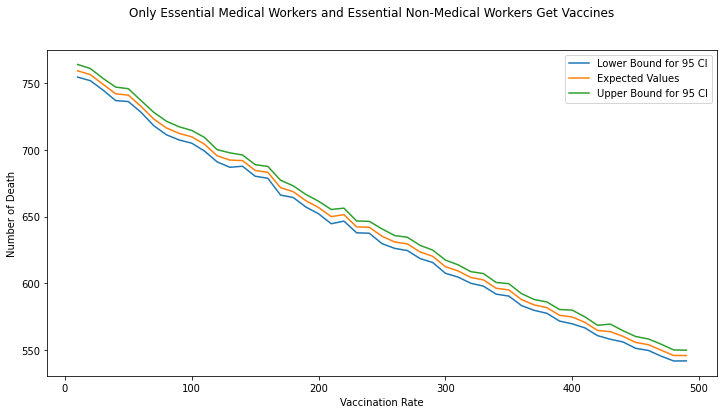

Finally, we tested the performance when all groups get vaccines at the same rate:

Total number of infections:

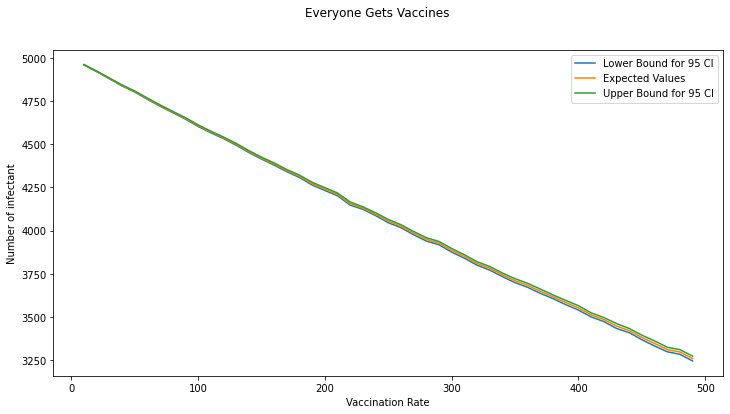

Total number of death:

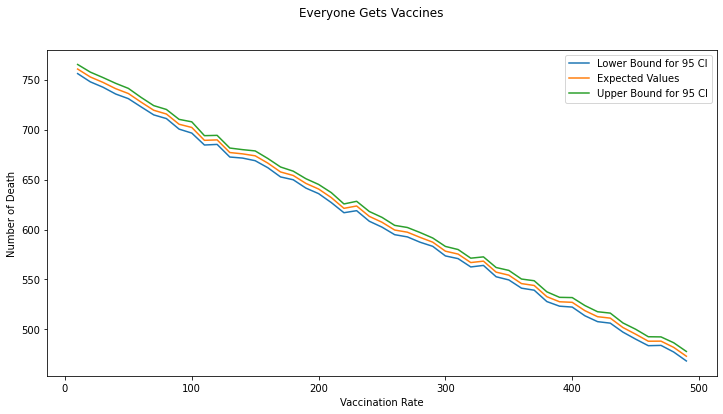

From the plot above, we can see that with the default parameters, as long as the vaccine supply rate increase, both total number of infections and total number of death would decrease significantly. However, different vaccination strategies would still lead to slightly different results. To be specific, the "all groups get vaccines" strategy gives the lowest total number of infections and total number of death. In contrast, the "only essential medical workers get vaccines" strategy yields slightly higher total number of infections and total number of death. However, we also believe that the results might subject to change when underlying assumptions or parameters changes.

#### 4.c Is quarantine effective?

For this question, we tested using two models. One model has quarantine measures. That is, when hospitals have reached the maximum capacity, all other symptomatic patients are transferred to a quarantine station, where they would have limited interactions with only essential medical workers and essential non-medical workers. Another model is essentially the same as the first one, but does not include a quarantine station. When hospitals have reached the maximum capacity, they would be sent back to their original groups.

The plot below shows how number of people in each group changes over time when there is no quarantine measure.

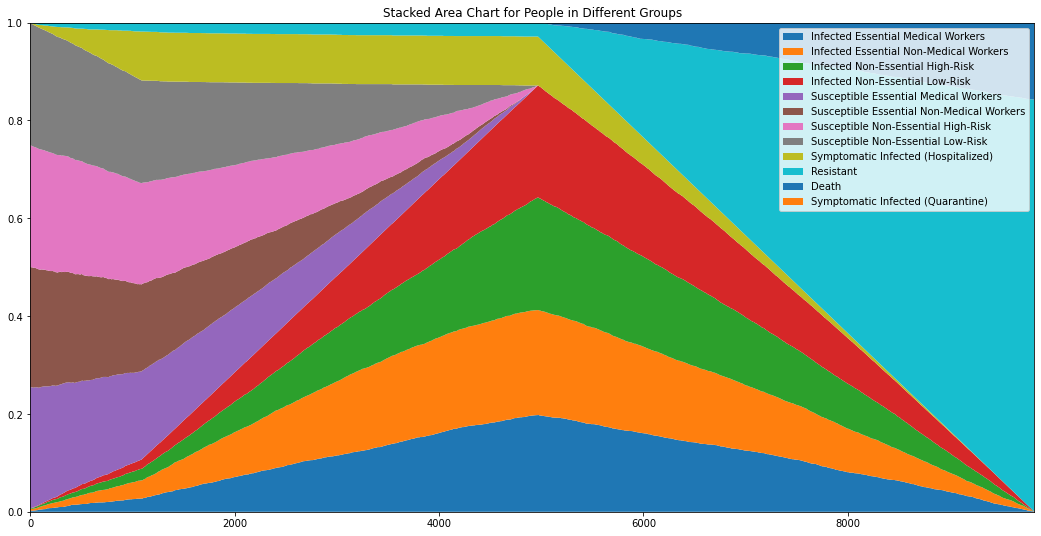

In addition to these two models, we also tested how results would change when the probability that an infection is symptomatic.

The plot below shows the DIFFERENCE in total number of infections between quarantine models and no-quarantine models.

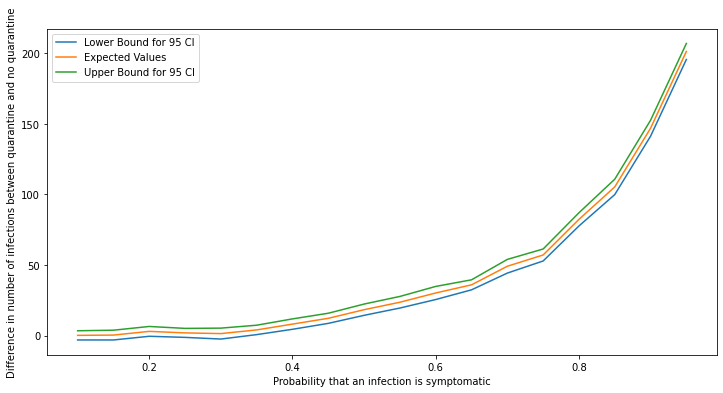

DIFFERENCE in total number of death between quarantine models and no-quarantine models:

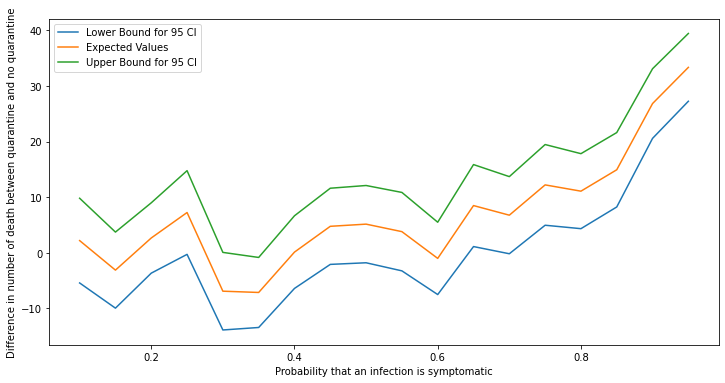

As we can see from plots above, it seems that quarantine stations are very useful in controlling the total number of infections, especially when the probability that an infection is symptomatic is high. However, for the total number of death, the relation is not quite clear (or stable). It seems that quarantine is effective in lowering total number of death only when the probability that an infection is symptomatic is very high.

#### 4.d Should we impose lockdown measures?

For this question, we added a lockdown multiplier parameter to our model. The multiplier is within range of 0 and 1. When the multiplier equals to 0, this means that people would not meet with each other at all. When the multiplier equals to 1, then people would interact as before. However, since no interactive is a rather unrealistic assumption, here we set the lower bound of multiplier to 0.1.

The total number of infections:

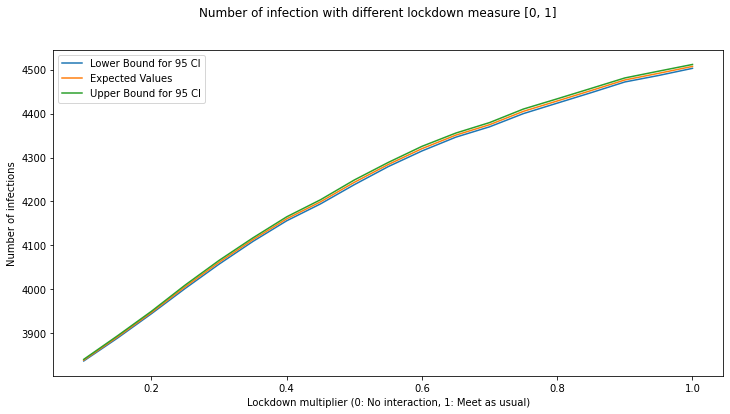

The total number of death:

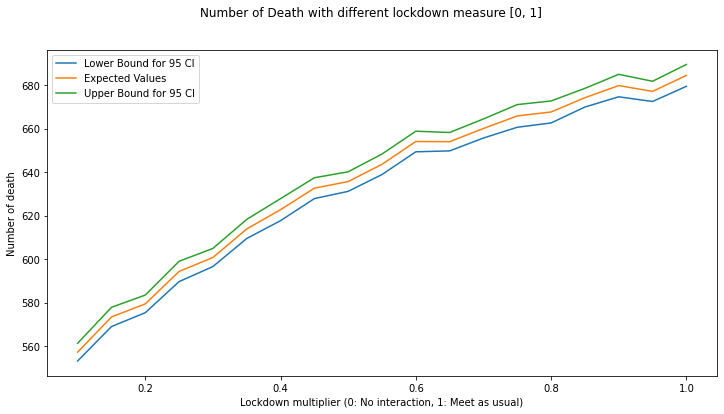

As shown above, the lockdown measures are very useful in decreasing the total number of infections and total number of death. Therefore, I would highly recommend imposing at least a moderate level of lockdown as an effort to control the pandemic.

#### 4.e 'Herd Immunity' vs Moderate level of Lockdown

In this experiment, we examined the possible outcomes of the so-called "Herd Immunity" Strategy. Here, the 'Herd Immunity' does not refer to the traditional herd immunity where a large number of vaccinated people form protections for those that are susceptible, but instead, refers to the immunity strategy as suggested by, say, the "Great Barrington Declaration", which allows or even encourages low-risk groups to voluntarily get infected. 

For our model configurations, to simulate what would happen when the "Herd Immunity" strategy is adopted, we increases the meeting rate of those non-essential low-risk workers and decreases the meeting rate of non-essential high-risk workers. Also, for comparison, we also tested the relative performance of a moderate level of lockdown measure using the original model.

Plot below shows how number of people in each group change over time when a "Herd Immunity" strategy is adopted.

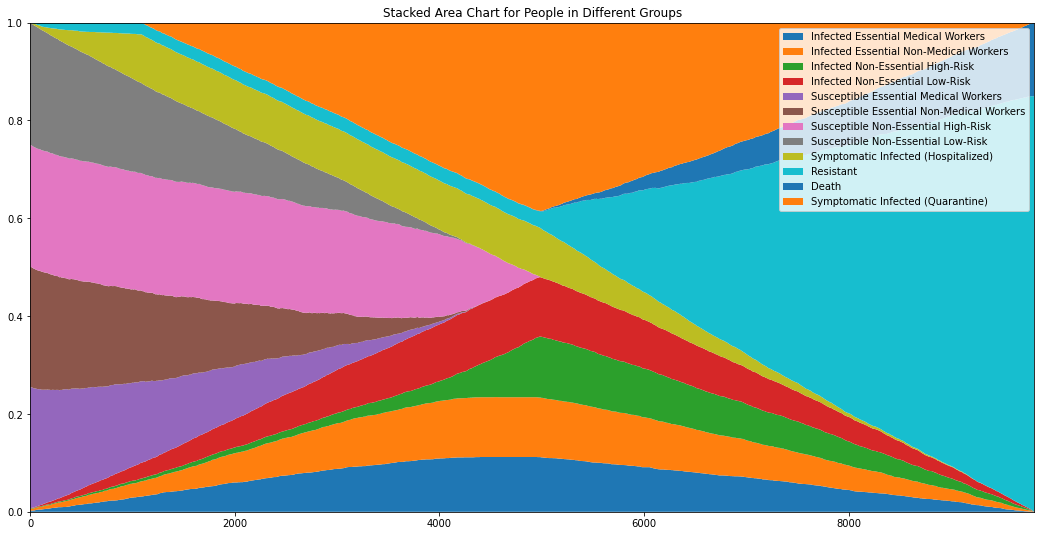

Since the effectiveness of 'herd immunity' strategy also depend heavily on the recovery rate, we created another parameter called recovery multiplier, which ranges from 0.1 to 5 to reflect different recovery rate.

The plot below shows the DIFFERENCE in total number of infections between 'herd immunity' and moderate level of lockdown.

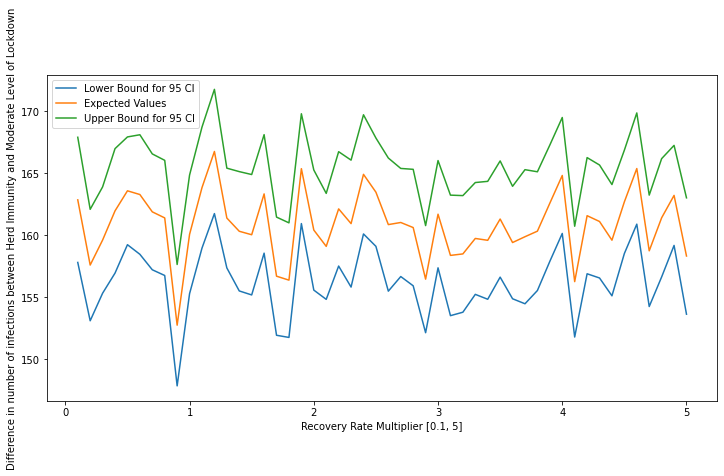

DIFFERENCE in total number of death between 'herd immunity' and moderate level of lockdown:

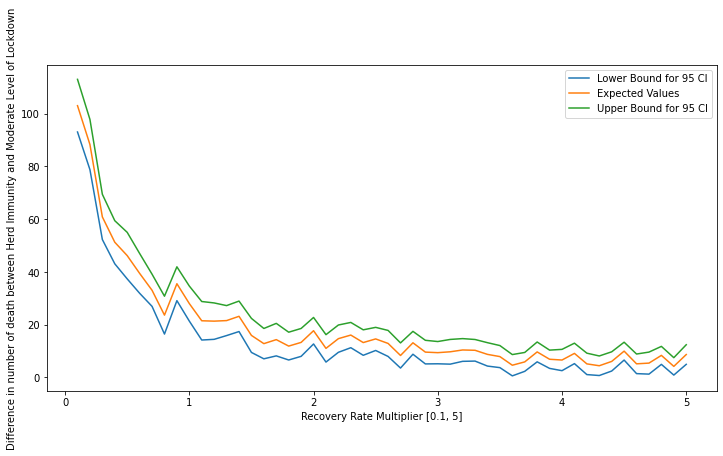

As shown above, for the total number of infections, it seems that the difference does not change much when the recovery rates changes and the difference is consistent above zero (so the 'herd immunity' strategy yields higher total number of infections ). However, for the total number of death, it seems that the difference gradually decreases when recovery rates increases (This mean when recovery rates are low, the lockdown measure outperforms 'herd immunity', but when recovery rates are high, the difference gradually decreases).

In conclusion, the simple lockdown measure outperforms the 'herd immunity' strategy in nearly all cases. Therefore, we would not recommend adopting the 'herd immunity' strategy in controlling the pandemic.

### 5. Conclusions

> In studying the strategies in controling the spread of disease, we considered whether these strategies can reduce the total number of infected population or can effectively decrease the death. We focused on five strategies: increase of hospital capacity, vaccination strategy, qurantine strategy, lockdown measures and herd immunity.

> Hospital Capacity: 

>> Based on our analysis, increasing the hopital capacity to accomodate more patients does not effectively reduce the total number of infected people but do decrease the number of death. This is reasonable because in our assumptions, the medical workers have higher meeting rate with the patients, leading to higher recovery rate as well.

> Vaccination Strategy: 

>> The more vaccinations are available, the fewer people will get infected and die. In the case that the production of vaccinations is not sufficient to cover all the population at one time, we need to consider the priority of class to get the vaccination as well. Our analysis shows that distributing the vaccinatin to all the groups outperforms distributing the vaccinations to only essential medical workers. However, this finding is subject to the change of parameters and assumptions.

> Quarantine Strategy: 

>> This strategy means that when the number of patients exceeds the hospital capacity, these patients will be sent to a special location for quarantine.  In this case, the interation between patients and other susceptible decreases but the recovery rate is lightly lower than the recovery rate for people staying at the hospital. Based on our analysis, we found that the quarantine is very useful in controlling the total number of infected people in the population. This strategy is especially effective when the number of infected people with symptom is high.

> Lockdown Measure:

>> Lockdown is a strategy that local government can impose rules to limit the interaction between people and to decrease the instances that the people with or without symptom to contact the susceptible people. This strategy is very effective in reducing the number of death and total number of infected people.

> Herd Immunity:

>> Regarding the total number of infections, the 'herd immunity' strategy yields higher total number of infections. However, the total number of death depends on the recovery rate. The herd immunity doesn't yield a better result than lockdown when the recovery rate is low but the difference slowly decreases as the recovery rate becomes high.

Based on our analysis and findings, we recommend the local public health department to add quarantine stations when the number of patients exceeds the capacity of hospitals and to increase the capacity of hospitals if possible. A moderate lockdown can significantly decrease both the transmission of disease and number of death. When the vaccination is available, the department can distribute the vaccinations to people in all the groups instead of just essential medical workers. We do recommend a mixed strategy rather than just focusing on one optimal strategy and please note that the recommendations are dependent on the parameters. 

### 6. Technical Appendices


We have attached the base model (SIR function) below. Please feel free to modify the code, tryout different parameters, or play with the animation. If you would like to explore how our analysis is conducted in great details, please also see our full source codes in the Github Repositary https://github.com/bojunl/ORIE5580-Epidemic-Modeling-Project

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython
import time

In [9]:
def SIR(c1_n, c2_n, c3_n, c4_n, c1_inf, c2_inf, c3_inf, c4_inf, Is_inf, R_res, H_cap, pi, reco_lo, reco_hi, die_lo, die_hi, h, l, inf_p_lo, inf_p_hi, vac_rate, keep_hist = False, lockdown_fac = 1.0, vac_pri = [1.0, 0., 0., 0.]):
    
    h = h * lockdown_fac
    l = l * lockdown_fac
    
    lam11 = h
    lam12 = h
    lam13 = l
    lam14 = l
    lam15 = h
    lam22 = h
    lam23 = h
    lam24 = h
    lam33 = l
    lam34 = l
    lam44 = l
    lamq1 = h
    lamq2 = l
    
    tot_infect = c1_inf + c2_inf + c3_inf + c4_inf + Is_inf
    
    c1_infect_hist = []
    c2_infect_hist = []
    c3_infect_hist = []
    c4_infect_hist = []
    c1_suscep_hist = []
    c2_suscep_hist = []
    c3_suscep_hist = []
    c4_suscep_hist = []
    Is_hist = []
    R_hist = []
    Death_hist = []
    Quarantine_hist = []
    
    c1_infect = []
    c2_infect = []
    c3_infect = []
    c4_infect = []
    c1_suscep = []
    c2_suscep = []
    c3_suscep = []
    c4_suscep = []
    Is = []
    R = []
    Death = []
    Quarantine = []
    
    for i in range(c1_n + c2_n + c3_n + c4_n + Is_inf + R_res):
        if i < c1_n:
            if i < c1_inf:
                c1_infect.append(i)
            else:
                c1_suscep.append(i)
        elif i < (c1_n + c2_n):
            if i < c1_n + c2_inf:
                c2_infect.append(i)
            else:
                c2_suscep.append(i)
        elif i < (c1_n + c2_n + c3_n):
            if i < c1_n + c2_n + c3_inf:
                c3_infect.append(i)
            else:
                c3_suscep.append(i)
        elif i < (c1_n + c2_n + c3_n + c4_n):
            if i < (c1_n + c2_n + c3_n + c4_inf):
                c4_infect.append(i)
            else:
                c4_suscep.append(i)
        elif i < (c1_n + c2_n + c3_n + c4_n + Is_inf):
            Is.append(i)
        else:
            R.append(i)
            
    if keep_hist == True:
        c1_infect_hist.append(c1_infect.copy())
        c2_infect_hist.append(c2_infect.copy())
        c3_infect_hist.append(c3_infect.copy())
        c4_infect_hist.append(c4_infect.copy())
        c1_suscep_hist.append(c1_suscep.copy())
        c2_suscep_hist.append(c2_suscep.copy())
        c3_suscep_hist.append(c3_suscep.copy())
        c4_suscep_hist.append(c4_suscep.copy())
        Is_hist.append(Is.copy())
        R_hist.append(R.copy())
        Death_hist.append(Death.copy())
        Quarantine_hist.append(Quarantine.copy())
    
    while len(c1_infect) + len(c2_infect) + len(c3_infect) + len(c4_infect) + len(Is) + len(Quarantine) > 0:
        
        # infection rates
        ra_11 = len(c1_infect) * len(c1_suscep) * lam11 * inf_p_hi
        ra_12 = len(c1_infect) * len(c2_suscep) * lam12 * inf_p_hi
        ra_21 = len(c1_suscep) * len(c2_infect) * lam12 * inf_p_hi
        ra_13 = len(c1_infect) * len(c3_suscep) * lam13 * inf_p_hi
        ra_31 = len(c1_suscep) * len(c3_infect) * lam13 * inf_p_hi
        ra_14 = len(c1_infect) * len(c4_suscep) * lam14 * inf_p_hi
        ra_41 = len(c1_suscep) * len(c4_infect) * lam14 * inf_p_hi
        ra_s1 = len(c1_suscep) * len(Is) * lam15 * inf_p_lo
        ra_22 = len(c2_infect) * len(c2_suscep) * lam22 * inf_p_hi
        ra_23 = len(c2_infect) * len(c3_suscep) * lam23 * inf_p_hi
        ra_32 = len(c2_suscep) * len(c3_infect) * lam23 * inf_p_hi
        ra_24 = len(c2_infect) * len(c4_suscep) * lam24 * inf_p_hi
        ra_42 = len(c2_suscep) * len(c4_infect) * lam24 * inf_p_hi
        ra_33 = len(c3_infect) * len(c3_suscep) * lam33 * inf_p_hi
        ra_34 = len(c3_infect) * len(c4_suscep) * lam34 * inf_p_hi
        ra_43 = len(c3_suscep) * len(c4_infect) * lam34 * inf_p_hi
        ra_44 = len(c4_infect) * len(c4_suscep) * lam44 * inf_p_hi
        
        # recover rates
        re_c1 = len(c1_infect) * reco_lo
        re_c2 = len(c2_infect) * reco_lo
        re_c3 = len(c3_infect) * reco_lo
        re_c4 = len(c4_infect) * reco_lo
        re_Is = len(Is) * reco_hi
        
        # death rates
        de_c1 = len(c1_infect) * die_hi
        de_c2 = len(c2_infect) * die_hi
        de_c3 = len(c3_infect) * die_hi
        de_c4 = len(c4_infect) * die_hi
        de_Is = len(Is) * die_lo
        
        # quanantine infection rates
        ra_q1 = len(Quarantine) * len(c1_suscep) * lamq1 * inf_p_lo
        ra_q2 = len(Quarantine) * len(c2_suscep) * lamq2 * inf_p_lo
        
        # vaccination rates
        va_c1 = len(c1_suscep) * vac_rate * vac_pri[0]
        va_c2 = len(c2_suscep) * vac_rate * vac_pri[1]
        va_c3 = len(c3_suscep) * vac_rate * vac_pri[2]
        va_c4 = len(c4_suscep) * vac_rate * vac_pri[3]
        
        # quarantine
        re_qu = len(Quarantine) * reco_lo
        de_qu = len(Quarantine) * die_hi
        
        sum_rate1 = ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1 + ra_22 + ra_23 + ra_32
        sum_rate2 = ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1 + re_c2 + re_c3 + re_c4 + re_Is
        sum_rate3 = de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2 + va_c1 + va_c2 + va_c3 + va_c4
        sum_rate = sum_rate1 + sum_rate2 + sum_rate3 + re_qu + de_qu
        
        rv = np.random.uniform()
        rv2 = np.random.uniform()
        
        if rv < ra_11 / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13) / sum_rate:
            infected = c3_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c3_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14) / sum_rate:
            infected = c4_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c4_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1 + ra_22) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1 + ra_22 + ra_23) / sum_rate:
            infected = c3_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c3_infect.append(infected)
        elif rv < (ra_11 + ra_12 + ra_21 + ra_13 + ra_31 + ra_14 + ra_41 + ra_s1 + ra_22 + ra_23 + ra_32) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (sum_rate1 + ra_24) / sum_rate:
            infected = c4_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c4_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33) / sum_rate:
            infected = c3_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c3_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34) / sum_rate:
            infected = c4_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c4_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43) / sum_rate:
            infected = c3_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c3_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44) / sum_rate:
            infected = c4_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c4_infect.append(infected)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1) / sum_rate:
            recovered = c1_infect.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1 + re_c2) / sum_rate:
            recovered = c2_infect.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1 + re_c2 + re_c3) / sum_rate:
            recovered = c3_infect.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + ra_24 + ra_42 + ra_33 + ra_34 + ra_43 + ra_44 + re_c1 + re_c2 + re_c3 + re_c4) / sum_rate:
            recovered = c4_infect.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + sum_rate2) / sum_rate:
            recovered = Is.pop(0)
            R.append(recovered)
        elif rv < (sum_rate1 + sum_rate2 + de_c1) / sum_rate:
            dead = c1_infect.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2) / sum_rate:
            dead = c2_infect.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3) / sum_rate:
            dead = c3_infect.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4) / sum_rate:
            dead = c4_infect.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is) / sum_rate:
            dead = Is.pop(0)
            Death.append(dead)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1) / sum_rate:
            infected = c1_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c1_infect.append(infected)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2) / sum_rate:
            infected = c2_suscep.pop(0)
            tot_infect += 1
            if rv2 < pi:
                if len(Is) < H_cap:
                    Is.append(infected)
                else:
                    Quarantine.append(infected)
            else:
                c2_infect.append(infected)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2 + va_c1) / sum_rate:
            vaccine = c1_suscep.pop(0)
            R.append(vaccine)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2 + va_c1 + va_c2) / sum_rate:
            vaccine = c2_suscep.pop(0)
            R.append(vaccine)
        elif rv < (sum_rate1 + sum_rate2 + de_c1 + de_c2 + de_c3 + de_c4 + de_Is + ra_q1 + ra_q2 + va_c1 + va_c2 + va_c3) / sum_rate:
            vaccine = c3_suscep.pop(0)
            R.append(vaccine)
        elif rv < (sum_rate1 + sum_rate2 + sum_rate3) / sum_rate:
            vaccine = c4_suscep.pop(0)
            R.append(vaccine)
        elif rv < (sum_rate1 + sum_rate2 + sum_rate3 + re_qu) / sum_rate:
            recovered = Quarantine.pop(0)
            R.append(recovered)
        else:
            dead = Quarantine.pop(0)
            Death.append(dead)
        
        if keep_hist == True:
            c1_infect_hist.append(c1_infect.copy())
            c2_infect_hist.append(c2_infect.copy())
            c3_infect_hist.append(c3_infect.copy())
            c4_infect_hist.append(c4_infect.copy())
            c1_suscep_hist.append(c1_suscep.copy())
            c2_suscep_hist.append(c2_suscep.copy())
            c3_suscep_hist.append(c3_suscep.copy())
            c4_suscep_hist.append(c4_suscep.copy())
            Is_hist.append(Is.copy())
            R_hist.append(R.copy())
            Death_hist.append(Death.copy())
            Quarantine_hist.append(Quarantine.copy())
        
    if keep_hist == True:
        return c1_infect_hist, c2_infect_hist, c3_infect_hist, c4_infect_hist, c1_suscep_hist, c2_suscep_hist, c3_suscep_hist, c4_suscep_hist, Is_hist, R_hist, Death_hist, Quarantine_hist
    else:
        return tot_infect, len(Death)

In [10]:
c1_infect_hist, c2_infect_hist, c3_infect_hist, c4_infect_hist, c1_suscep_hist, c2_suscep_hist, c3_suscep_hist, c4_suscep_hist\
, Is_hist, R_hist, death_hist, quar_hist = SIR(100, 300, 300, 300, 1, 3, 1, 0, 0, 0, 50, 0.5, 0.1, 0.3, 0.01, 0.02, 1.5, 0.5, 0.05, 0.6, 50, True)

c1_inf_num = [len(item) for item in c1_infect_hist]
c2_inf_num = [len(item) for item in c2_infect_hist]
c3_inf_num = [len(item) for item in c3_infect_hist]
c4_inf_num = [len(item) for item in c4_infect_hist]
c1_sus_num = [len(item) for item in c1_suscep_hist]
c2_sus_num = [len(item) for item in c2_suscep_hist]
c3_sus_num = [len(item) for item in c3_suscep_hist]
c4_sus_num = [len(item) for item in c4_suscep_hist]
Is_num = [len(item) for item in Is_hist]
R_num = [len(item) for item in R_hist]
D_num = [len(item) for item in death_hist]
Q_num = [len(item) for item in quar_hist]

data = pd.DataFrame({'Infected Essential Medical Workers':c1_inf_num, 'Infected Essential Non-Medical Workers':c2_inf_num, \
                    'Infected Non-Essential High-Risk':c3_inf_num, 'Infected Non-Essential Low-Risk':c4_inf_num, \
                    'Susceptible Essential Medical Workers':c1_sus_num, 'Susceptible Essential Non-Medical Workers':c2_sus_num, \
                    'Susceptible Non-Essential High-Risk': c3_sus_num, 'Susceptible Non-Essential Low-Risk':c4_sus_num, \
                    'Symptomatic Infected (Hospitalized)':Is_num, 'Resistant':R_num, 'Death':D_num, 'Symptomatic Infected (Quarantine)':Q_num})

data_perc = data.divide(data.sum(axis=1), axis = 0)


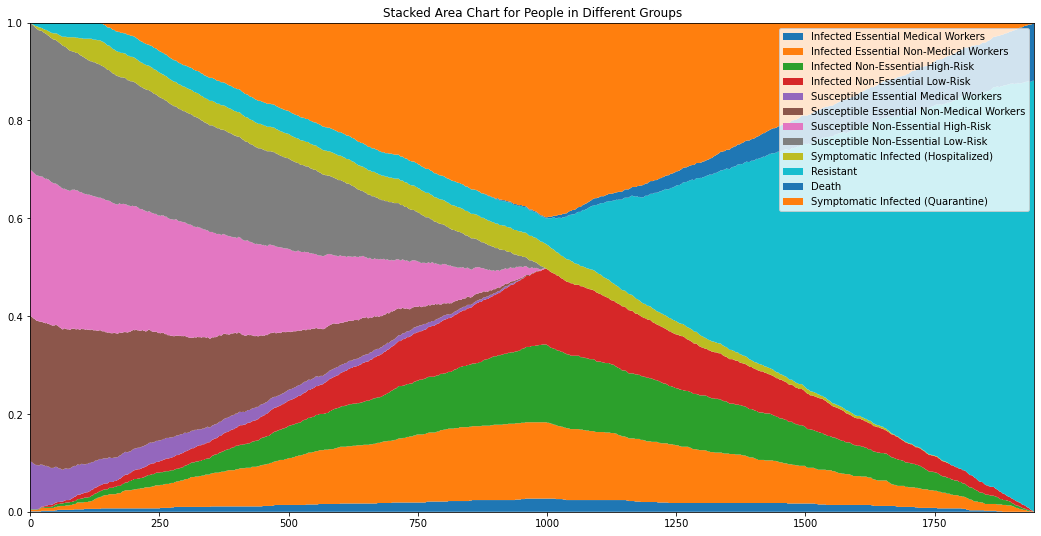

In [16]:
# Animation
for i in range(1, len(c1_inf_num)):
    IPython.display.clear_output(wait = True)
    plt.figure(figsize=(18, 9))
    plt.stackplot(range(0,i),  data_perc["Infected Essential Medical Workers"][:i],  data_perc["Infected Essential Non-Medical Workers"][:i], \
              data_perc["Infected Non-Essential High-Risk"][:i], data_perc["Infected Non-Essential Low-Risk"][:i], \
              data_perc["Susceptible Essential Medical Workers"][:i], data_perc["Susceptible Essential Non-Medical Workers"][:i], \
              data_perc["Susceptible Non-Essential High-Risk"][:i], data_perc["Susceptible Non-Essential Low-Risk"][:i], \
              data_perc["Symptomatic Infected (Hospitalized)"][:i], data_perc["Resistant"][:i], data_perc["Death"][:i], data_perc["Symptomatic Infected (Quarantine)"][:i], labels=data_perc.columns)
    plt.legend(loc='upper right')
    plt.margins(0,0)
    plt.title('Stacked Area Chart for People in Different Groups')
    plt.show()
    time.sleep(0.001)